In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix # confusion matrix
from sklearn.model_selection import learning_curve

# We can override the default matplotlib styles with those of Seaborn
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("model_dataset.csv")

In [3]:
model_data = df.copy()

In [4]:
model_data.drop("Unnamed: 0", inplace=True, axis=1)

In [5]:
model_data

,charges,charges_log,smoker_log,age_log,children_log,bmi_log
0,16884.92,9.734235,0.693147,2.995732,0.000000,3.363842
1,1725.55,7.453880,0.000000,2.944439,0.693147,3.548755
2,4449.46,8.400763,0.000000,3.367296,1.386294,3.526361
3,21984.47,9.998137,0.000000,3.526361,0.000000,3.165475
4,3866.86,8.260457,0.000000,3.496508,0.000000,3.397189
...,...,...,...,...,...,...
1321,10600.55,9.268755,0.000000,3.931826,1.386294,3.464798
1322,2205.98,7.699380,0.000000,2.944439,0.000000,3.494080
1323,1629.83,7.396844,0.000000,2.944439,0.000000,3.633631
1324,2007.94,7.605362,0.000000,3.091042,0.000000,3.288402


In [6]:
X = model_data[['smoker_log', 'age_log', 'children_log', 'bmi_log']]
y = model_data[['charges']]

In [7]:
X

,smoker_log,age_log,children_log,bmi_log
0,0.693147,2.995732,0.000000,3.363842
1,0.000000,2.944439,0.693147,3.548755
2,0.000000,3.367296,1.386294,3.526361
3,0.000000,3.526361,0.000000,3.165475
4,0.000000,3.496508,0.000000,3.397189
...,...,...,...,...
1321,0.000000,3.931826,1.386294,3.464798
1322,0.000000,2.944439,0.000000,3.494080
1323,0.000000,2.944439,0.000000,3.633631
1324,0.000000,3.091042,0.000000,3.288402


In [8]:
X_copy = X.copy()

In [ ]:
X_copy 

In [ ]:
y

In [11]:
y_log = model_data[['charges_log']]

In [12]:
y_log

,charges_log
0,9.734235
1,7.453880
2,8.400763
3,9.998137
4,8.260457
...,...
1321,9.268755
1322,7.699380
1323,7.396844
1324,7.605362


In [128]:
X.shape

(1326, 4)

In [129]:
y.shape

(1326, 1)

## Feature Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

In [15]:
# Fit the input data (X)
scaler.fit(X_copy)

StandardScaler()

In [16]:
# Scale with the method 'transform()'
x_scaled = scaler.transform(X_copy)

In [17]:
x_scaled

array([[ 1.99623706, -1.66514591, -1.04373951, -0.3602442 ],
       [-0.50094251, -1.80057372,  0.19708798,  0.59626764],
       [-0.50094251, -0.68412022,  1.43791548,  0.48042674],
       ...,
       [-0.50094251, -1.80057372, -1.04373951,  1.03531074],
       [-0.50094251, -1.41350192, -1.04373951, -0.75047548],
       [ 1.99623706,  1.32205376, -1.04373951, -0.15495609]],
      shape=(1326, 4))

## Feature Selection

In [18]:
from sklearn.feature_selection import f_regression

f_statistic, p_values = f_regression(x_scaled,y_log)

/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
f_statistic

array([1012.26163413,  541.9047854 ,   42.78527414,   24.67512678])

In [29]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Create selector instance
selector = SelectKBest(mutual_info_regression, k=3)

# Fit the selector to the data
selector.fit(x_scaled, y_log)

# Transform the data (get the selected features)
X_new = selector.transform(x_scaled)

# Access feature scores
feature_scores = selector.scores_

# Check the selected features
selected_indices = selector.get_support(indices=True)


/Users/michaeladebayo/Documents/Simplon/brief_projects/machine_learning/prediction_prime_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
selected_indices

array([0, 1, 2])

## Checking OLS Assumption

In [40]:
# Drop unwanted column

selected_x = X_copy.drop("bmi_log", axis = 1)

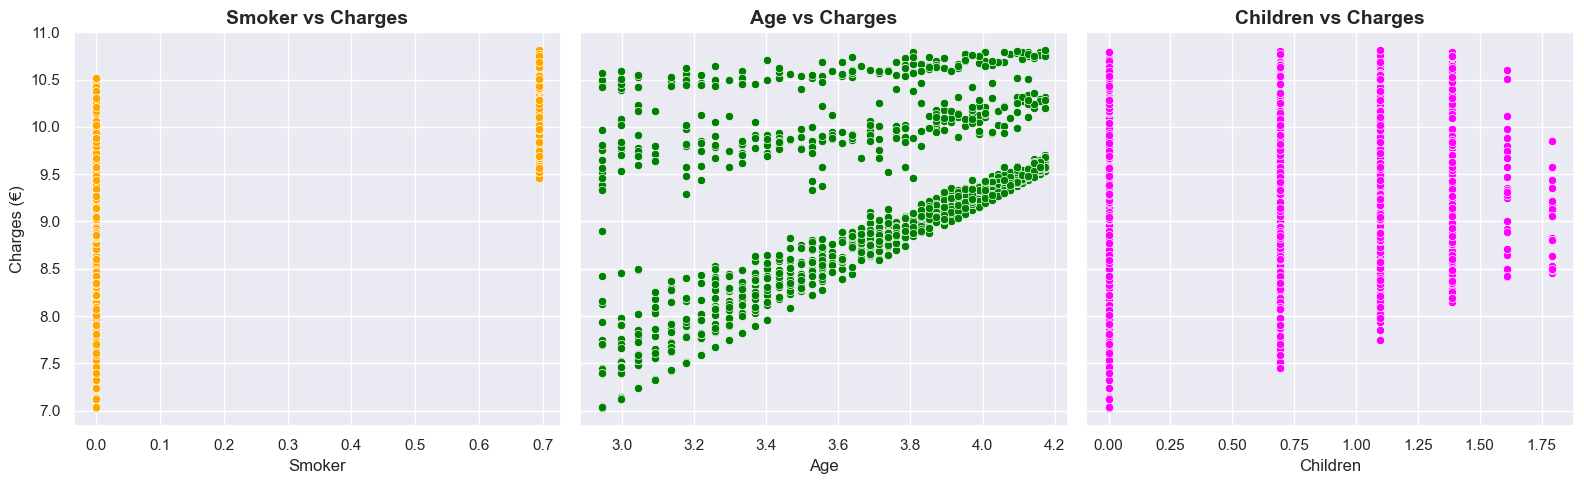

In [46]:
# Create a figure with 3 subplots in 1 row
fig, axes = plt.subplots(1, 3, figsize = (16, 5), sharey=True) 

# Scatter plot: age vs bmi
sns.scatterplot(data=model_data, x='smoker_log', y='charges_log', ax=axes[0], color='orange')
axes[0].set_title('Smoker vs Charges', fontsize=14, weight='bold')
axes[0].set_xlabel('Smoker', fontsize=12, weight='normal')
axes[0].set_ylabel('Charges (€)', fontsize=12, weight='normal')

# Scatter plot: children vs bmi
sns.scatterplot(data=model_data, x='age_log', y='charges_log', ax=axes[1], color='green')
axes[1].set_title('Age vs Charges', fontsize=14, weight='bold')
axes[1].set_xlabel('Age', fontsize=12, weight='normal')

# Scatter plot: children vs age_log
sns.scatterplot(data=model_data, x='children_log', y='charges_log', ax=axes[2], color='magenta')
axes[2].set_title('Children vs Charges', fontsize=14, weight='bold')
axes[2].set_xlabel('Children', fontsize=12, weight='normal')

# Adjust layout
plt.tight_layout()
plt.show()

## Checking for multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = model_data[['smoker_log','age_log','children_log']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

In [49]:
vif

,VIF,Features
0,1.244813,smoker_log
1,2.336425,age_log
2,2.112585,children_log


## Linear Regression Model

In [101]:
# model = LinearRegression()
# model.fit(X,y)
# model.score(X,y)

# predictions = model.predict(X)

# plt.scatter(X, y)
# plt.plot(X, predictions, c = 'r')